<a href="https://colab.research.google.com/github/dongzooo/Quant-with-py/blob/main/2_%EC%A2%85%EB%AA%A9%20%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C%20%EB%B6%84%EC%84%9D/%ED%95%B4%EC%99%B8%EC%A3%BC%EC%8B%9D_RSI%2C_MDD_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
meta = yf.Ticker('META.OQ')
print(meta)

yfinance.Ticker object <META.OQ>


In [3]:
# 종목 코드 설정
pair = "035420.KS"

# 특정 날짜 데이터 불러오기
start_date = "2021-01-01"
end_date = "2023-07-10"
data = yf.download(pair, start=start_date, end=end_date)

# 결과 출력
print(data)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close     Adj Close   Volume
Date                                                                     
2021-01-04  291500.0  294000.0  285500.0  293000.0  291276.68750   947178
2021-01-05  291500.0  292500.0  286500.0  292500.0  290779.62500   912657
2021-01-06  292500.0  300500.0  289500.0  290000.0  288294.34375  1375856
2021-01-07  288500.0  292000.0  286500.0  289500.0  287797.28125  1155734
2021-01-08  293500.0  312000.0  290000.0  312000.0  310164.96875  3175396
...              ...       ...       ...       ...           ...      ...
2023-07-03  182800.0  190600.0  182800.0  189300.0  189300.00000   869777
2023-07-04  188200.0  190200.0  186700.0  188700.0  188700.00000   491576
2023-07-05  188000.0  190200.0  186500.0  186500.0  186500.00000   686759
2023-07-06  185500.0  196200.0  185500.0  195500.0  195500.00000  1503767
2023-07-07  195600.0  197300.0  193800.0  1

In [4]:
# 데이터프레임으로 변환
df = pd.DataFrame(data)

In [5]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-03', '2023-07-04', '2023-07-05',
               '2023-07-06', '2023-07-07'],
              dtype='datetime64[ns]', name='Date', length=620, freq=None)

In [6]:
window = 90  # 3개월치
df['price_max'] = df['Close'].rolling(window, min_periods=1).max()
# df['price_max'] = df['Close'].rolling(window).max()

#07-2) 낙폭: drawdown
df['drawdown'] = (df['Close']/df['price_max'] - 1.0) * 100.

#07-3) 최대 낙폭 : MDD(maximum drawdown)
df['mdd'] = df['drawdown'].rolling(window, min_periods=1).min()
# df
df

,Open,High,Low,Close,Adj Close,Volume,price_max,drawdown,mdd
Date,,,,,,,,,
2021-01-04,291500.0,294000.0,285500.0,293000.0,291276.68750,947178,293000.0,0.000000,0.000000
2021-01-05,291500.0,292500.0,286500.0,292500.0,290779.62500,912657,293000.0,-0.170648,-0.170648
2021-01-06,292500.0,300500.0,289500.0,290000.0,288294.34375,1375856,293000.0,-1.023891,-1.023891
2021-01-07,288500.0,292000.0,286500.0,289500.0,287797.28125,1155734,293000.0,-1.194539,-1.194539
2021-01-08,293500.0,312000.0,290000.0,312000.0,310164.96875,3175396,312000.0,0.000000,-1.194539
...,...,...,...,...,...,...,...,...,...
2023-07-03,182800.0,190600.0,182800.0,189300.0,189300.00000,869777,216500.0,-12.563510,-19.262473
2023-07-04,188200.0,190200.0,186700.0,188700.0,188700.00000,491576,216500.0,-12.840647,-19.262473
2023-07-05,188000.0,190200.0,186500.0,186500.0,186500.00000,686759,216500.0,-13.856813,-19.262473


In [7]:
def calculate_rsi(prices, period=14):
    deltas = np.diff(prices)
    seed = deltas[:period + 1]
    up = seed[seed >= 0].sum() / period
    down = -seed[seed < 0].sum() / period
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:period] = 100. - 100. / (1. + rs)

    for i in range(period, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (period - 1) + upval) / period
        down = (down * (period - 1) + downval) / period
        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

df['rsi'] = calculate_rsi(df['Close'], period=14)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,price_max,drawdown,mdd,rsi
Date,,,,,,,,,,
2021-01-04,291500.0,294000.0,285500.0,293000.0,291276.68750,947178,293000.0,0.000000,0.000000,74.561404
2021-01-05,291500.0,292500.0,286500.0,292500.0,290779.62500,912657,293000.0,-0.170648,-0.170648,74.561404
2021-01-06,292500.0,300500.0,289500.0,290000.0,288294.34375,1375856,293000.0,-1.023891,-1.023891,74.561404
2021-01-07,288500.0,292000.0,286500.0,289500.0,287797.28125,1155734,293000.0,-1.194539,-1.194539,74.561404
2021-01-08,293500.0,312000.0,290000.0,312000.0,310164.96875,3175396,312000.0,0.000000,-1.194539,74.561404
...,...,...,...,...,...,...,...,...,...,...
2023-07-03,182800.0,190600.0,182800.0,189300.0,189300.00000,869777,216500.0,-12.563510,-19.262473,41.137021
2023-07-04,188200.0,190200.0,186700.0,188700.0,188700.00000,491576,216500.0,-12.840647,-19.262473,40.354391
2023-07-05,188000.0,190200.0,186500.0,186500.0,186500.00000,686759,216500.0,-13.856813,-19.262473,37.534635


In [10]:
pair = 'NAVER'

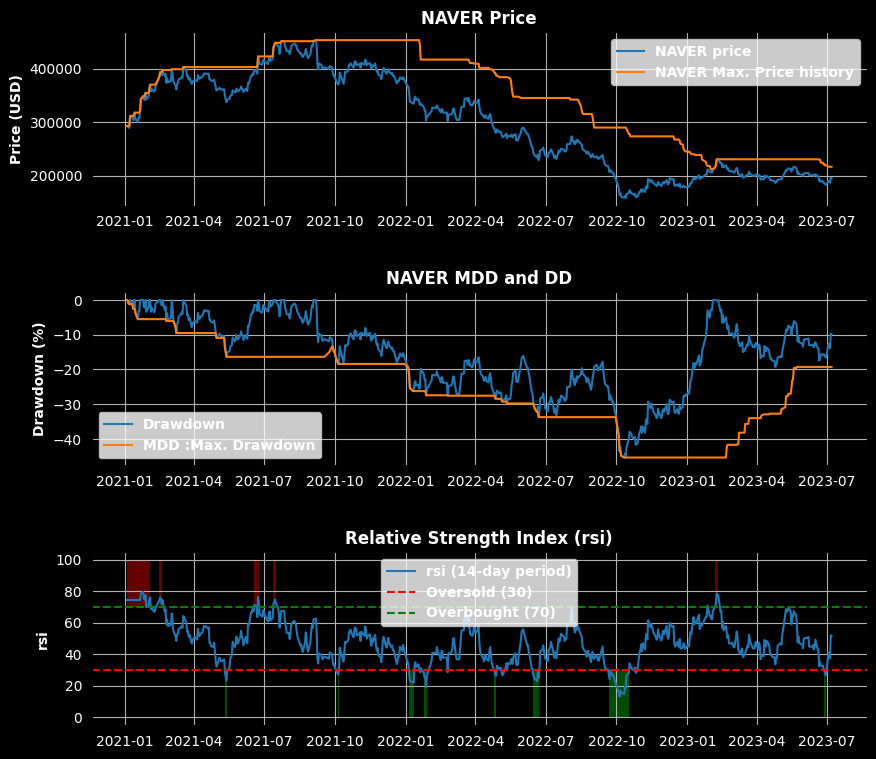

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10, 9))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('black')

axs[0].plot(df.index, df['Close'], label=pair + ' price')
axs[0].plot(df.index, df['price_max'], label=pair + ' Max. Price history')
axs[0].set_title(pair + ' Price', fontweight='bold', color='white')
axs[0].set_ylabel('Price (USD)', fontweight='bold', color='white')
axs[0].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[0].grid(True)

axs[1].plot(df.index, df['drawdown'], label='Drawdown')
axs[1].plot(df.index, df['mdd'], label='MDD :Max. Drawdown')
axs[1].set_title(pair + ' MDD and DD', fontweight='bold', color='white')
axs[1].set_ylabel('Drawdown (%)', fontweight='bold', color='white')
axs[1].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[1].grid(True)

axs[2].plot(df.index, df['rsi'], label='rsi (14-day period)')
axs[2].axhline(y=30, color='r', linestyle='--', label='Oversold (30)')
axs[2].axhline(y=70, color='g', linestyle='--', label='Overbought (70)')
axs[2].fill_between(df.index, 0, 30, where=(df['rsi'] <= 30), facecolor='green', alpha=0.6)
axs[2].fill_between(df.index, 70, 100, where=(df['rsi'] >= 70), facecolor='red', alpha=0.4)
axs[2].set_title('Relative Strength Index (rsi)', fontweight='bold', color='white')
axs[2].set_ylabel('rsi', fontweight='bold', color='white')
axs[2].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[2].grid(True)

# 텍스트 색상 설정
for ax in axs:
    ax.title.set_color('white')
    ax.yaxis.label.set_color('white')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_color('white')
    for text in ax.legend().get_texts():
        text.set_color('white')
        text.set_fontweight('bold')

# 그래프 사이의 간격 조절
plt.subplots_adjust(hspace=0.5)
plt.show()